<a href="https://colab.research.google.com/github/D-Strauss/ML-project-1/blob/main/ML_Project_Version_7_No_OOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Importing libraries for the full project.

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import keras
from keras import layers
import re
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from scipy.stats import randint
from sklearn.decomposition import PCA
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from tensorflow.keras import layers, Model, Input
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


**Read in the dataframe and get an overview of the data.**

In [2]:
df = pd.read_csv("/content/EEG.machinelearing_data_BRMH.csv")
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


**Dealing with NaNs**
I will be using the mean for education level to replace NaNs and avarage IQ (100) for IQ.

In [4]:
# Remove unnecessary columns
df = df.drop(columns=["eeg.date", "sex", "specific.disorder"])

# Finding and removing all coherence metrics from the dataset.
columns = df.columns.tolist()
for col in columns:
  if "COH" in col:
    df.drop(columns=[col], inplace= True)


In [5]:
# Check dataset for NaNs
total_nans = df.isna().sum().sum()
print(f"Total NaN values in the dataset: {total_nans}")

# Per column
NaN_column = df.isna().sum()
NaN_column = NaN_column[NaN_column > 0]
print(NaN_column)

Total NaN values in the dataset: 973
education        15
IQ               13
Unnamed: 122    945
dtype: int64


In [6]:
# @title Remove NaNs
# Calculate the mean of education level to be used for NaNs
import numpy as np
avarage_education = np.mean(df["education"])
print(avarage_education)

# Replace the values containing the NaNs in the education column
df["education"].fillna(avarage_education, inplace=True)

# Replace the values containing NaN´s in IQ
IQ = 100
df["IQ"].fillna(IQ, inplace=True)

# Remove the unnamed column containing NaNs
if "DS" in df.columns:
    df = df.drop(columns="DS")
else:
    print("Column 'DS' does not exist in the DataFrame.")

# Check if 'Unnamed: 122' exists in the DataFrame
if 'Unnamed: 122' in df.columns:
    print("Column 'Unnamed: 122' exists in the DataFrame.")
    # Remove the column
    df = df.drop(columns='Unnamed: 122')
    print("Column 'Unnamed: 122' has been removed.")
else:
    print("Column 'Unnamed: 122' does not exist in the DataFrame.")

# Check that NaNs have been removed from all columns
NaN_column = df.isna().sum()
NaN_column = NaN_column[NaN_column > 0]
print(f"/if this is empty, the NaNs have been effectively removed", NaN_column)


13.438709677419356
Column 'DS' does not exist in the DataFrame.
Column 'Unnamed: 122' exists in the DataFrame.
Column 'Unnamed: 122' has been removed.
/if this is empty, the NaNs have been effectively removed Series([], dtype: int64)


<ipython-input-6-857f70ce3e37>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].fillna(avarage_education, inplace=True)
<ipython-input-6-857f70ce3e37>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [7]:
# Filter data to remove the categorical and descriptive variables for plotting.
drop_columns= ["main.disorder", "IQ", "education", "age", "no."]
dropped_columns = df[drop_columns] # Save the categorical into a variable for later concatenation
df_main = df.drop(columns=drop_columns)

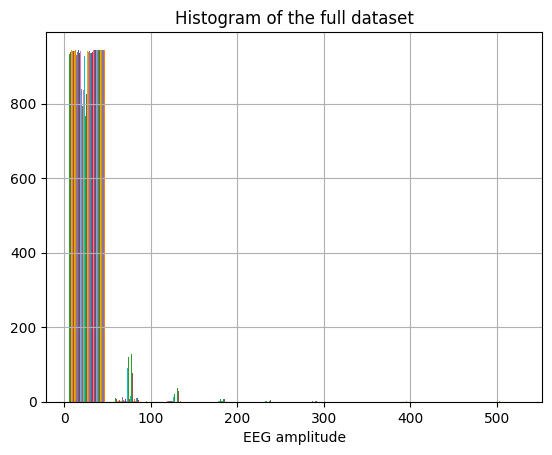

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,17.042218,11.790176,16.405732,19.566879,...,2.767162,2.736202,2.852528,2.131400,2.397203,2.436697,2.465187,2.431201,3.549241,3.501666
std,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,9.272096,7.347929,8.246200,9.525142,...,2.454680,3.499157,3.705205,2.402956,2.197773,2.137977,2.189441,2.477094,4.853481,5.155927
min,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,2.552213,2.128977,2.213470,3.149313,...,0.077350,0.084348,0.073880,0.057436,0.094525,0.086495,0.098177,0.085225,0.129663,0.101598
25%,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,10.381770,7.042545,10.686639,13.130418,...,1.344736,1.282516,1.033983,0.851493,1.105636,1.185822,1.182338,1.023967,1.169422,1.159454
50%,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,15.050377,10.044354,14.525494,17.245633,...,2.144473,1.987610,1.720832,1.522197,1.801815,1.882408,1.888060,1.713623,2.105134,2.148575
75%,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,20.810308,14.246874,20.271380,23.792159,...,3.349047,3.132080,3.226708,2.594355,2.965286,2.926328,3.087733,2.936825,4.026164,3.875667
max,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,69.071230,77.283412,65.932521,88.474026,...,24.111093,73.443483,41.393856,44.110996,21.162924,22.499065,22.502034,21.763724,70.018106,75.538846


In [8]:
# Histogram
%matplotlib inline
plt.figure()
plt.hist(df_main)
plt.title("Histogram of the full dataset")
plt.xlabel("EEG amplitude")
plt.grid()
plt.ion()
plt.show()

df_main.describe()

The Histogram displays some extreme values. I will plot further to get an idea where the extreme points emerge from.

The boxplot demonstrate that the outlier issue may be a scaling problem.

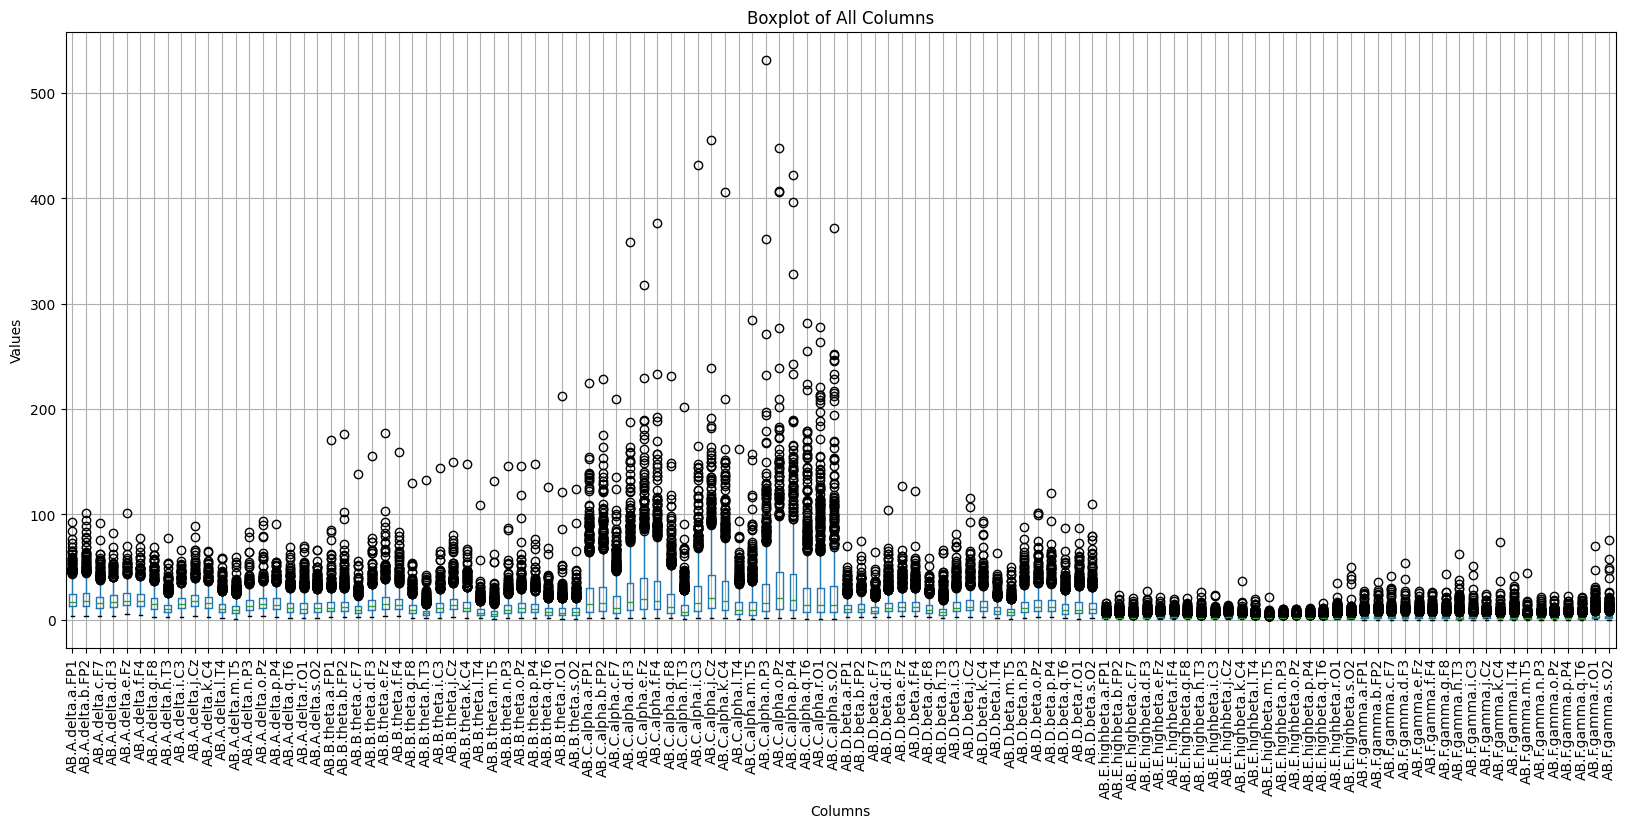

In [9]:
### Plotting box plots
plt.figure(figsize=(20, 8))  # Adjust the size as needed for readability
df_main.boxplot()
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

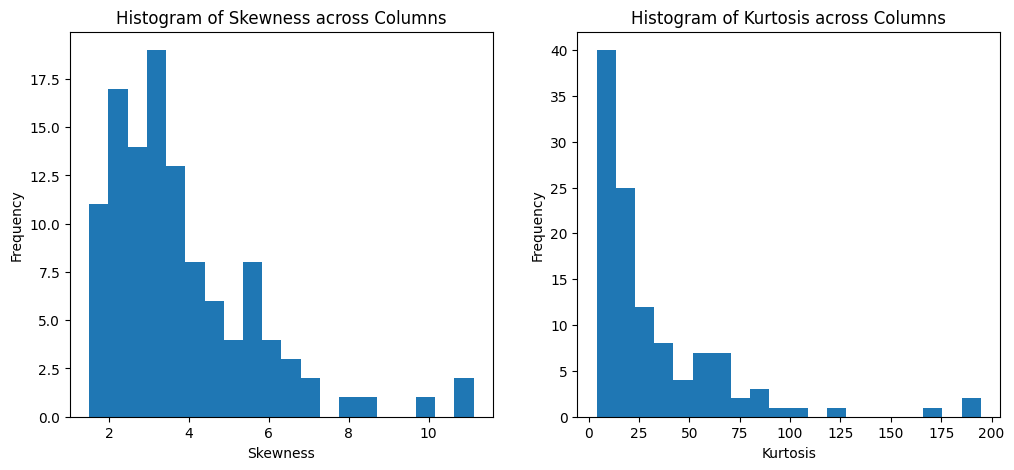

In [10]:
# Check Skewness and Kurtosis
skewness = df_main.skew()
kurtosis = df_main.kurtosis()
extreme_value_freq = df

# Plot histograms of skewness and kurtosis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(skewness, bins=20)
plt.xlabel("Skewness")
plt.ylabel("Frequency")
plt.title("Histogram of Skewness across Columns")

plt.subplot(1, 2, 2)
plt.hist(kurtosis, bins=20)
plt.xlabel("Kurtosis")
plt.ylabel("Frequency")
plt.title("Histogram of Kurtosis across Columns")
plt.show()


In [11]:
# Create a filter mask to filter out descriptive and categorical variables in preprocessing.
filter_mask = df[["no.", "main.disorder", "IQ", "education", "age"]]
df_main = df
columns_operations = df_main.columns[~df_main.columns.isin(filter_mask)]

Find outliers with a standard deviation of more than 5. Replace them with the value of the 5th standard deviation. Count how many outliers will be removed.

In [12]:
# The threshold for outlier detection
sd_threshold = 5

# Initialize the dictionary where the counter will be
outlier_counts = {}

# Iterate over each column to identify and handle outliers
for column in df_main[columns_operations].columns:
    mean = df_main[column].mean()
    std_dev = df_main[column].std()

    # Identify the outliers based on the defined threshold
    lower_bound = mean - sd_threshold * std_dev
    upper_bound = mean + sd_threshold * std_dev

    # Count the number of outliers
    outliers_count = df_main[column].apply(lambda x: x < lower_bound or x > upper_bound).sum()
    outlier_counts[column] = outliers_count

    # Convert outliers to 0
    df_main[column] = df_main[column].apply(lambda x: 0 if x < lower_bound or x > upper_bound else x)

    # Calculate the 5th standard deviation value (mean ± 5 * std_dev)
    fifth_std_value = mean + 5 * std_dev

    # Replace 0s (outliers converted to 0) with the 5th standard deviation value
    df_main[column] = df_main[column].replace(0, fifth_std_value)

# Display the count of outliers for each column
for column, count in outlier_counts.items():
    print(f"Column '{column}' had {count} outliers replaced.")

# Display the modified DataFrame
print(df_main)


Column 'AB.A.delta.a.FP1' had 2 outliers replaced.
Column 'AB.A.delta.b.FP2' had 4 outliers replaced.
Column 'AB.A.delta.c.F7' had 2 outliers replaced.
Column 'AB.A.delta.d.F3' had 2 outliers replaced.
Column 'AB.A.delta.e.Fz' had 2 outliers replaced.
Column 'AB.A.delta.f.F4' had 2 outliers replaced.
Column 'AB.A.delta.g.F8' had 1 outliers replaced.
Column 'AB.A.delta.h.T3' had 5 outliers replaced.
Column 'AB.A.delta.i.C3' had 1 outliers replaced.
Column 'AB.A.delta.j.Cz' had 2 outliers replaced.
Column 'AB.A.delta.k.C4' had 2 outliers replaced.
Column 'AB.A.delta.l.T4' had 4 outliers replaced.
Column 'AB.A.delta.m.T5' had 4 outliers replaced.
Column 'AB.A.delta.n.P3' had 4 outliers replaced.
Column 'AB.A.delta.o.Pz' had 4 outliers replaced.
Column 'AB.A.delta.p.P4' had 1 outliers replaced.
Column 'AB.A.delta.q.T6' had 4 outliers replaced.
Column 'AB.A.delta.r.O1' had 3 outliers replaced.
Column 'AB.A.delta.s.O2' had 2 outliers replaced.
Column 'AB.B.theta.a.FP1' had 4 outliers replace

Standardize the data based on standardscaler to ensure that the values is following the same scale.

In [13]:
scaler = StandardScaler()
df_main[columns_operations] = scaler.fit_transform(df_main[columns_operations])
scaled_df_main = df_main

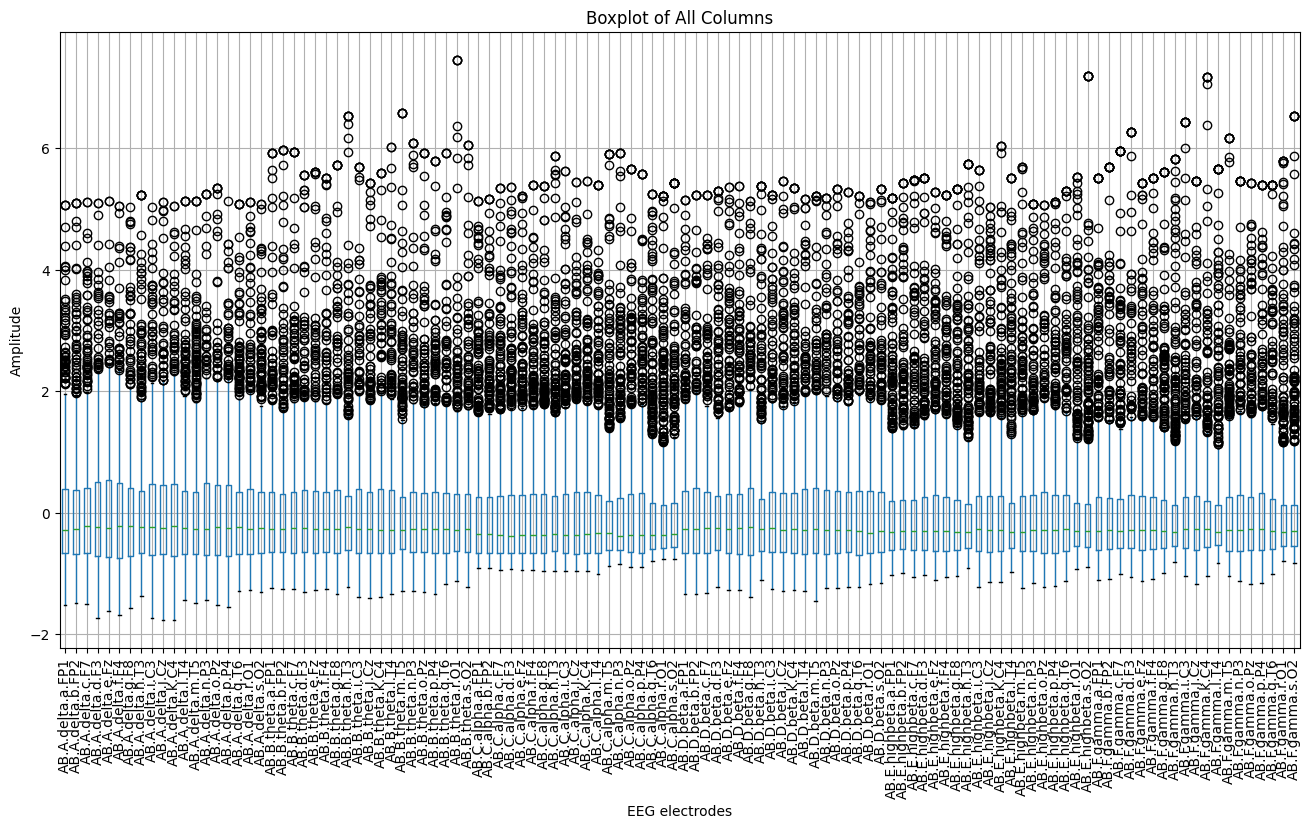

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
count,945.000000,945.000000,945.000000,945.000000,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,...,9.450000e+02,9.450000e+02,9.450000e+02,945.000000,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,945.000000
mean,473.000000,30.594804,13.438710,101.558730,2.105312e-16,1.879743e-16,-9.022765e-17,-2.180502e-16,-1.447402e-16,2.969993e-16,...,-1.203035e-16,1.203035e-16,-3.759485e-17,0.000000,-9.022765e-17,1.503794e-16,1.052656e-16,-1.503794e-17,7.518971e-17,0.000000
std,272.942302,11.781592,2.530117,16.905802,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,...,1.000530e+00,1.000530e+00,1.000530e+00,1.000530,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530
min,1.000000,18.000000,0.000000,49.000000,-1.516548e+00,-1.491604e+00,-1.496766e+00,-1.731721e+00,-1.614544e+00,-1.683843e+00,...,-1.178369e+00,-1.048000e+00,-8.269122e-01,-1.039752,-1.127877e+00,-1.176312e+00,-1.150228e+00,-1.006819e+00,-7.949087e-01,-0.822816
25%,237.000000,21.730000,12.000000,91.000000,-6.621860e-01,-6.767312e-01,-6.717578e-01,-7.185318e-01,-7.221457e-01,-7.463122e-01,...,-6.168178e-01,-5.592431e-01,-5.349653e-01,-0.633798,-6.266237e-01,-6.205774e-01,-6.182341e-01,-5.990288e-01,-5.480083e-01,-0.556580
50%,473.000000,26.150000,13.000000,102.000000,-2.777467e-01,-2.750094e-01,-2.219791e-01,-2.401077e-01,-2.469502e-01,-2.229182e-01,...,-2.624720e-01,-2.716211e-01,-3.261092e-01,-0.290907,-2.814961e-01,-2.684376e-01,-2.719390e-01,-2.994414e-01,-3.258148e-01,-0.307642
75%,709.000000,35.450000,16.000000,114.000000,3.893413e-01,3.765627e-01,3.987805e-01,5.006264e-01,5.429487e-01,4.892451e-01,...,2.712481e-01,1.952313e-01,1.317956e-01,0.257223,2.952894e-01,2.592873e-01,3.167361e-01,2.319189e-01,1.303516e-01,0.127026
max,945.000000,71.880000,20.000000,145.000000,5.068654e+00,5.101250e+00,5.108046e+00,5.086331e+00,5.128906e+00,5.051601e+00,...,5.451500e+00,7.170629e+00,5.651385e+00,6.162980,5.461346e+00,5.415743e+00,5.383008e+00,5.392539e+00,5.779622e+00,6.521011


In [14]:
# Plotting box plots
plt.figure(figsize=(16, 8))
scaled_df_main[columns_operations].boxplot()
plt.title('Boxplot of All Columns')
plt.xlabel('EEG electrodes')
plt.ylabel('Amplitude')
plt.xticks(rotation=90)
plt.show()
scaled_df_main.describe()

The boxplot demonstrate that the outliers have been effectively dealt with.

**One hot encoding to convert categorical variables into numerical identifiers**

In [15]:
# Check unique subtypes of the label
subtypes = df_main['main.disorder'].unique()
print("The Unique psychiatric subtypes are:", subtypes)

# One hot encoding
df_main = pd.get_dummies(df_main, columns=["main.disorder"], prefix="main_disorder")

# Removes spaces
df_main.columns = df_main.columns.str.strip().str.replace(' ', '_')

print(df_main)
print("Column names:", df_main.columns.tolist())


The Unique psychiatric subtypes are: ['Addictive disorder' 'Trauma and stress related disorder' 'Mood disorder'
 'Healthy control' 'Obsessive compulsive disorder' 'Schizophrenia'
 'Anxiety disorder']
     no.   age  education     IQ  AB.A.delta.a.FP1  AB.A.delta.b.FP2  \
0      1  57.0   13.43871  100.0          1.422718          0.048363   
1      2  37.0    6.00000  120.0         -0.604683         -0.844819   
2      3  32.0   16.00000  113.0          0.878737          0.534142   
3      4  35.0   18.00000  126.0          0.120212          0.059155   
4      5  36.0   16.00000  112.0          1.582327          1.039567   
..   ...   ...        ...    ...               ...               ...   
940  941  22.0   13.00000  116.0          1.948421          1.303311   
941  942  26.0   13.00000  118.0         -0.105164         -0.144703   
942  943  26.0   16.00000  113.0          0.774512          0.936327   
943  944  24.0   13.00000  107.0         -0.020537          0.338381   
944  945

In [16]:
# Check for duplicate column names in df_main
duplicate_columns = df.columns[df.columns.duplicated()].unique()

# Print the duplicate column names, if any
if duplicate_columns.size > 0:
    print("Duplicate columns found in df_main:")
    print(duplicate_columns)
else:
    print("No duplicate columns found in df_main.")


No duplicate columns found in df_main.


In [62]:
# @title The first algorithm to be utilized is random forest.
# Define X (features)
X = df_main.filter(like="AB", axis=1)

# Create a binary target variable y: 1 for schizophrenia, 0 for healthy control
y = pd.Series(
    np.where(
        df_main["main_disorder_Schizophrenia"] == 1, 1,
        np.where(df_main["main_disorder_Healthy_control"] == 1, 0, np.nan)
    ),
    index=df_main.index  # Ensures that y has the same index as df_main
)
# Drop rows containing NaNs (not schizophrenia or healthy control)
X = X.loc[y.notna()]
y = y[y.notna()]

# Now safely convert y to int
y = y.astype(int)

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(max_features = 0.20, n_estimators=20, min_samples_leaf=20)
rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", roc_auc)
print("However, despite model optimization the accuracy never reached above 68%, the parameters chosen in the following case was one which was most balanced.")

Accuracy: 0.627906976744186
Precision: 0.6538461538461539
Recall: 0.7083333333333334
AUC Score: 0.6491228070175439
However, despite model optimization the accuracy never reached above 68%, the parameters chosen in the following case was one which was most balanced.


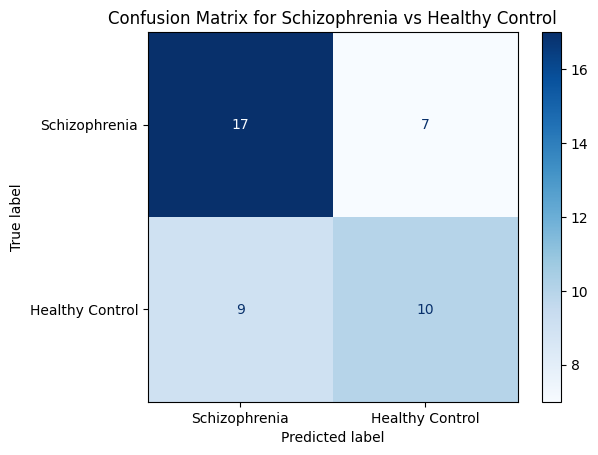

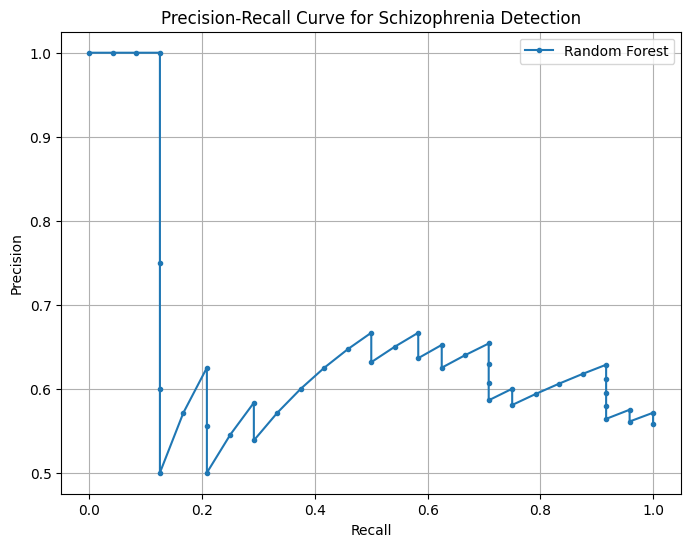

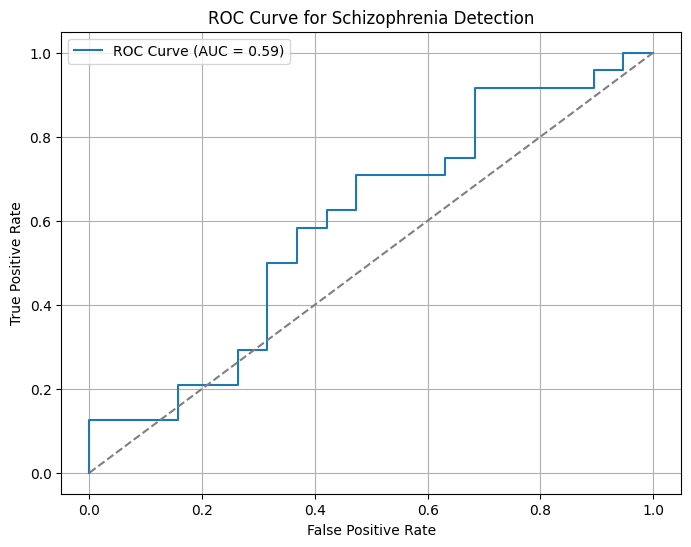

In [18]:
# @title Plotting
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Schizophrenia", "Healthy Control"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Schizophrenia vs Healthy Control")
plt.show()
#------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (schizophrenia)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Schizophrenia Detection')
plt.legend()
plt.grid()
plt.show()
#-------------------------------------------------------------------------------
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Schizophrenia Detection')
plt.legend()
plt.grid()
plt.show()


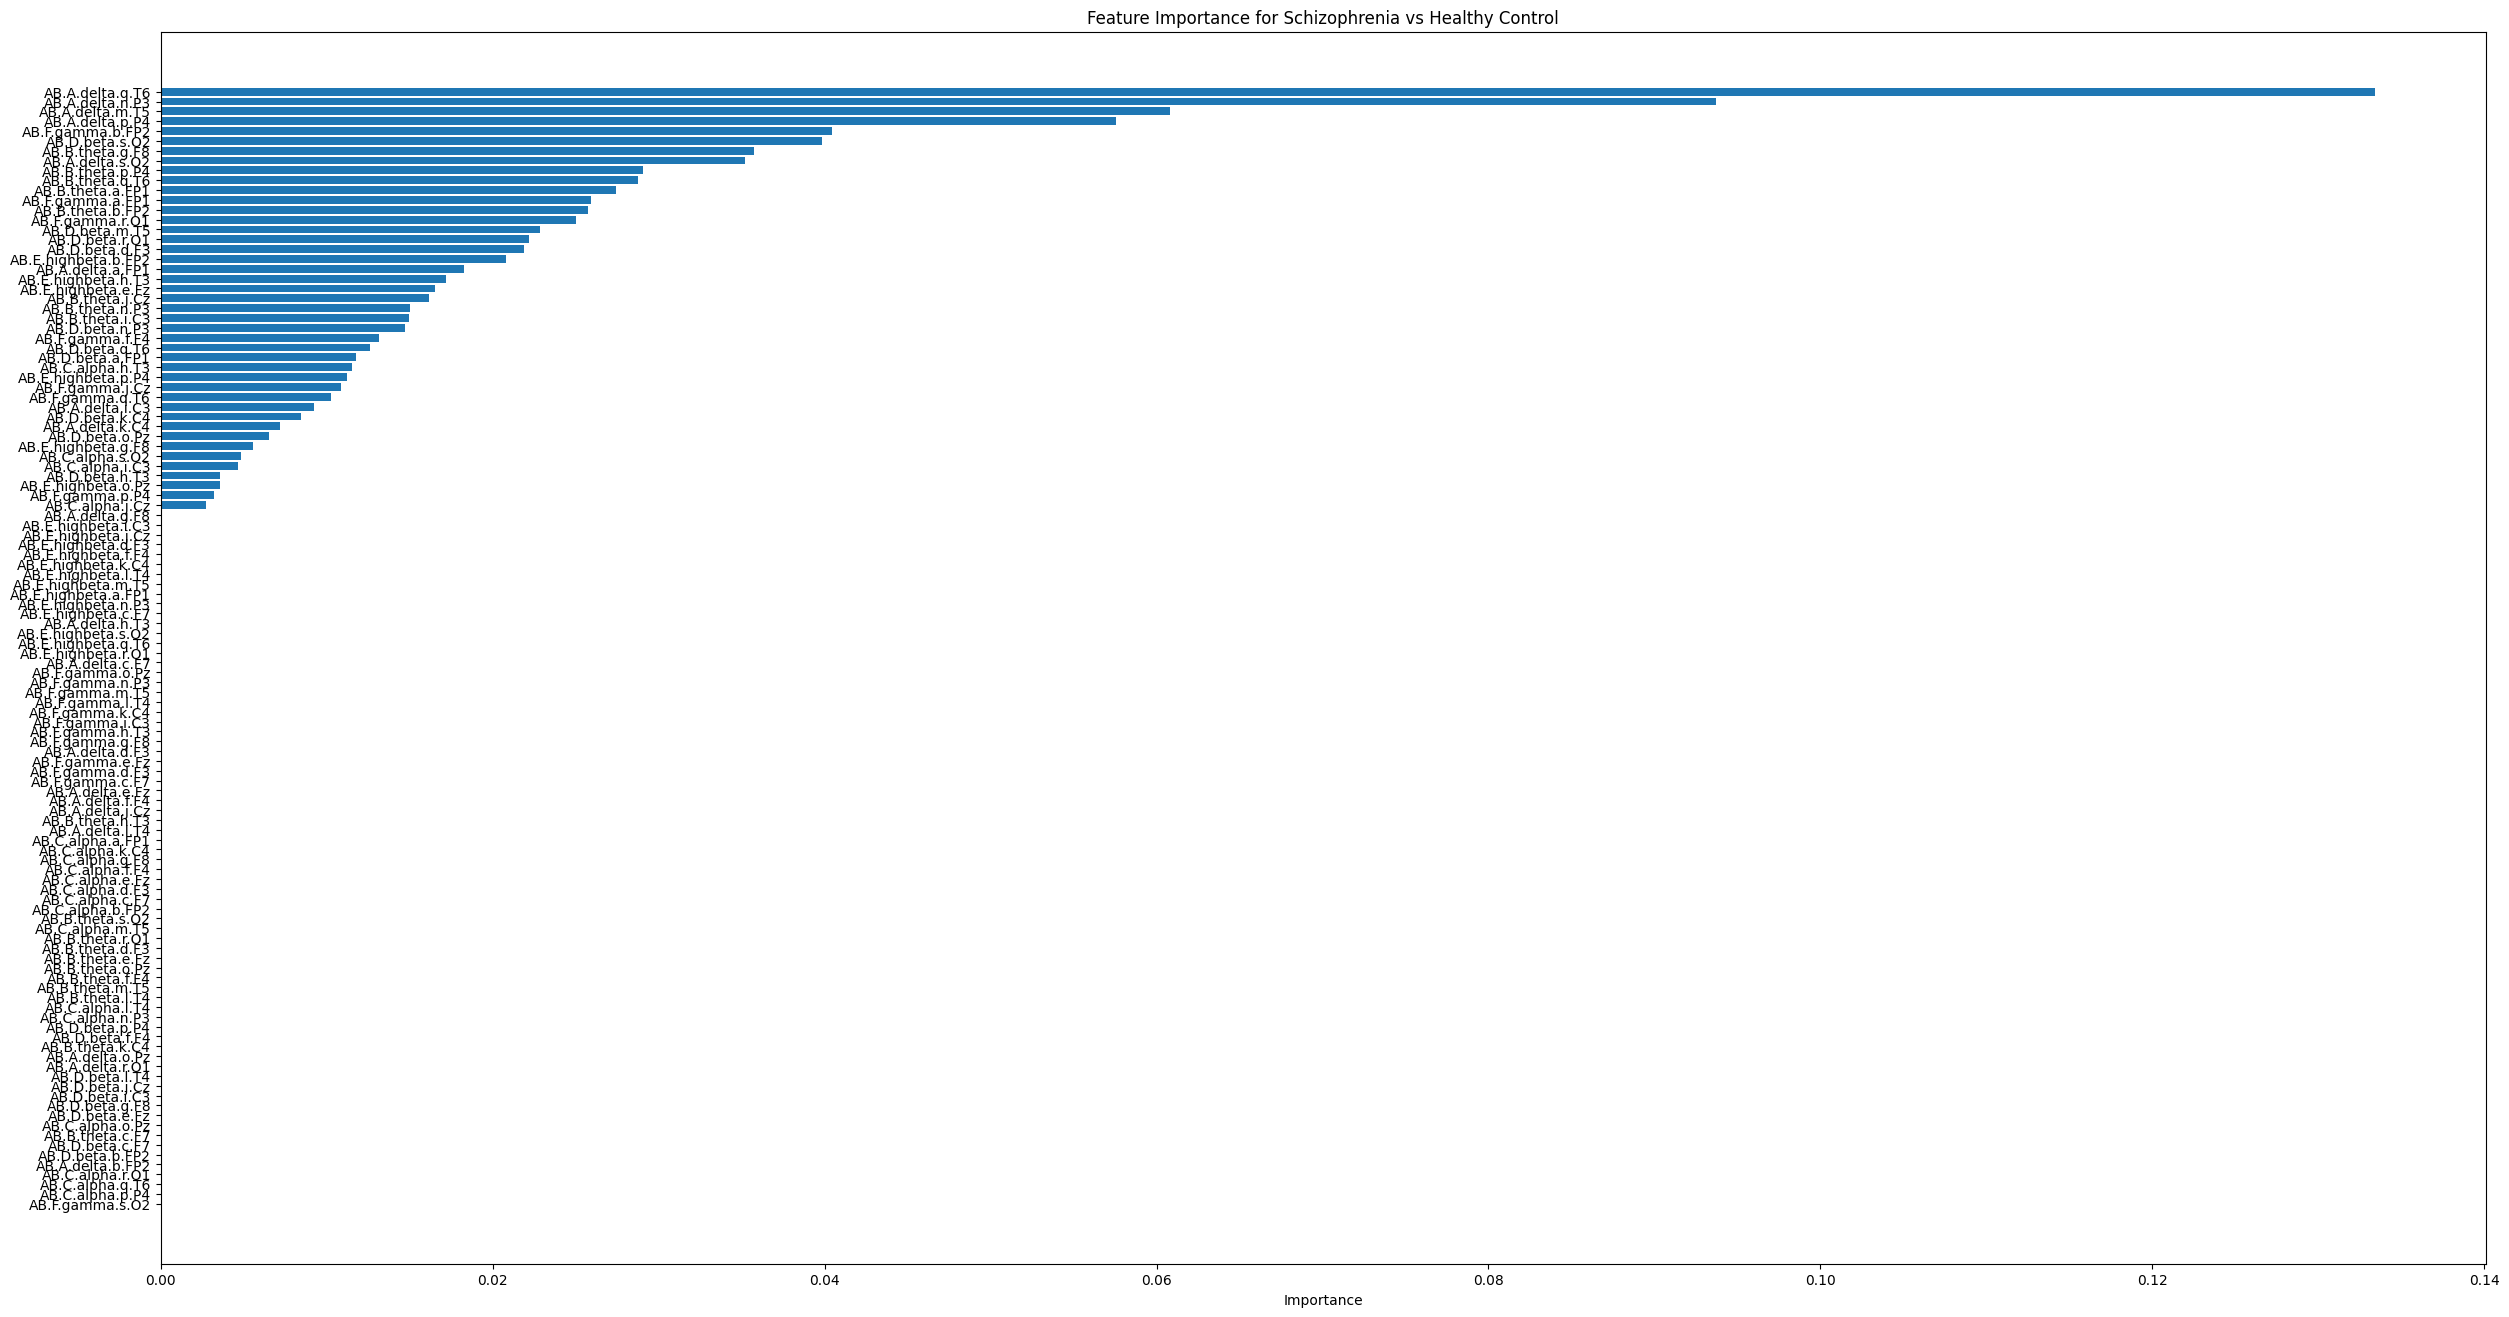

In [19]:
# @title Plotting feature importances.
# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 16))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Schizophrenia vs Healthy Control')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


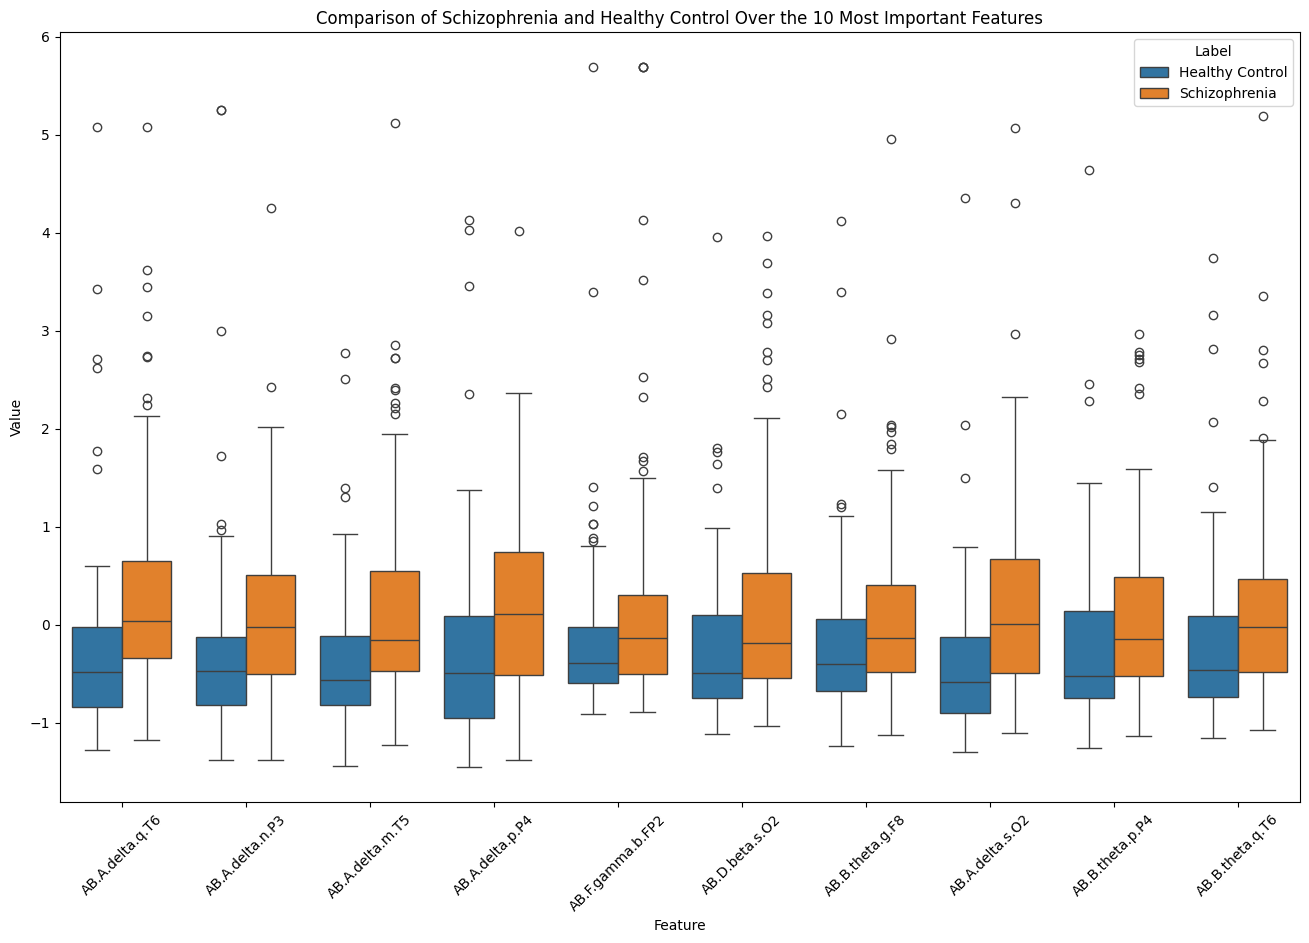


Statistical Comparison (t-tests):
Feature: AB.A.delta.q.T6 | t-statistic: 3.94 | p-value: 0.00011
  - The difference for 'AB.A.delta.q.T6' is statistically significant (p < 0.05).
Feature: AB.A.delta.n.P3 | t-statistic: 2.74 | p-value: 0.00670
  - The difference for 'AB.A.delta.n.P3' is statistically significant (p < 0.05).
Feature: AB.A.delta.m.T5 | t-statistic: 4.81 | p-value: 0.00000
  - The difference for 'AB.A.delta.m.T5' is statistically significant (p < 0.05).
Feature: AB.A.delta.p.P4 | t-statistic: 3.35 | p-value: 0.00096
  - The difference for 'AB.A.delta.p.P4' is statistically significant (p < 0.05).
Feature: AB.F.gamma.b.FP2 | t-statistic: 2.19 | p-value: 0.02964
  - The difference for 'AB.F.gamma.b.FP2' is statistically significant (p < 0.05).
Feature: AB.D.beta.s.O2 | t-statistic: 3.25 | p-value: 0.00135
  - The difference for 'AB.D.beta.s.O2' is statistically significant (p < 0.05).
Feature: AB.B.theta.g.F8 | t-statistic: 2.06 | p-value: 0.04111
  - The difference for 'A

In [64]:
# @title I will now plot the 10 most important features and perform a statistical test to see whether there are significant differences between the two groups on these features.
# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)['Feature'].values

# Filter the original DataFrame for these features and the target variable
plot_df = df_main[top_10_features].copy()
plot_df['Label'] = y.apply(lambda x: 'Schizophrenia' if x == 1 else 'Healthy Control')

# Melt the DataFrame for easier plotting with Seaborn
melted_df = plot_df.melt(id_vars='Label', value_vars=top_10_features, var_name='Feature', value_name='Value')

# Plotting
plt.figure(figsize=(16, 10))
sns.boxplot(data=melted_df, x='Feature', y='Value', hue='Label')
plt.title('Comparison of Schizophrenia and Healthy Control Over the 10 Most Important Features')
plt.xticks(rotation=45)
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------ Running a simple statistical test to explore ift the top 10 features between test group and control are statistically significant ------------------------------------------
from scipy.stats import ttest_ind

# Extract the top 10 most important features
top_10_features = feature_importance_df.head(10)['Feature'].values

# Create separate dataframes for Schizophrenia and Healthy Control based on y
schizophrenia_df = X[y == 1]
healthy_control_df = X[y == 0]

# Perform t-tests for each feature and print the results
print("\nStatistical Comparison (t-tests):")
for feature in top_10_features:
    # Extract the feature values for both groups as 1D arrays
    schizophrenia_data = schizophrenia_df[feature].values.ravel()
    healthy_control_data = healthy_control_df[feature].values.ravel()

    # Perform the t-test
    t_stat, p_value = ttest_ind(schizophrenia_data, healthy_control_data, nan_policy='omit')

    # Ensure t_stat and p_value are scalars (in case they are arrays)
    t_stat = t_stat.item() if hasattr(t_stat, 'item') else t_stat
    p_value = p_value.item() if hasattr(p_value, 'item') else p_value

    # Print the results
    print(f"Feature: {feature} | t-statistic: {t_stat:.2f} | p-value: {p_value:.5f}")

    # Interpretation
    if p_value < 0.05:
        print(f"  - The difference for '{feature}' is statistically significant (p < 0.05).")
    else:
        print(f"  - No significant difference for '{feature}' (p >= 0.05).")

print("Statistical Significance was reached in all features")

Now i will take the 20 most important features, then train the model on only those features.

In [65]:
# Create a single target variable , 1 is schizophrenia, 0 is control
df_main['target'] = np.where(
    df_main['main_disorder_Schizophrenia'] == 1, 1,
    np.where(df_main['main_disorder_Healthy_control'] == 1, 0, np.nan)
)

# Drop rows where the target is NaN (i.e., neither Schizophrenia nor Healthy Control)
df_main = df_main[df_main['target'].notna()]

# Convert target to integer
df_main['target'] = df_main['target'].astype(int)

# Extract y
y2 = df_main['target']

# Extract top 20 features
top_20_feature_names = feature_importance_df["Feature"].drop_duplicates().head(20).tolist()
print("Top 20 feature names:", top_20_feature_names)

# Exclude target variables from the top features
target_columns = ['main_disorder_Schizophrenia', 'main_disorder_Healthy_control', 'target']
top_20_feature_names = [feat for feat in top_20_feature_names if feat not in target_columns]

print("Top 20 feature names after excluding target variables:", top_20_feature_names)

Top 20 feature names: ['AB.A.delta.q.T6', 'AB.A.delta.n.P3', 'AB.A.delta.m.T5', 'AB.A.delta.p.P4', 'AB.F.gamma.b.FP2', 'AB.D.beta.s.O2', 'AB.B.theta.g.F8', 'AB.A.delta.s.O2', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.a.FP1', 'AB.F.gamma.a.FP1', 'AB.B.theta.b.FP2', 'AB.F.gamma.r.O1', 'AB.D.beta.m.T5', 'AB.D.beta.r.O1', 'AB.D.beta.d.F3', 'AB.E.highbeta.b.FP2', 'AB.A.delta.a.FP1', 'AB.E.highbeta.h.T3']
Top 20 feature names after excluding target variables: ['AB.A.delta.q.T6', 'AB.A.delta.n.P3', 'AB.A.delta.m.T5', 'AB.A.delta.p.P4', 'AB.F.gamma.b.FP2', 'AB.D.beta.s.O2', 'AB.B.theta.g.F8', 'AB.A.delta.s.O2', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.a.FP1', 'AB.F.gamma.a.FP1', 'AB.B.theta.b.FP2', 'AB.F.gamma.r.O1', 'AB.D.beta.m.T5', 'AB.D.beta.r.O1', 'AB.D.beta.d.F3', 'AB.E.highbeta.b.FP2', 'AB.A.delta.a.FP1', 'AB.E.highbeta.h.T3']


In [66]:
# @title Subsequently i will use hypertuning to observe whether parameter optimization can improve the result further.

from sklearn.model_selection import GridSearchCV

# Define New X
X2 = df_main[top_20_feature_names]

# Ensure that X and y have the same indices
X2 = X.loc[y.index]

# Verify that X and y have the same length
print("Number of rows in X:", X.shape[0])
print("Number of rows in y:", y.shape[0])

# Check for missing values in X
if X.isnull().values.any():
    print("Missing values found in X. Proceeding to drop rows with missing values.")
    X = X.dropna()
    y = y.loc[X.index]

# Split train-test dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, stratify=y, random_state=42)

## Optimizing with hypertuning parameter search

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [20, 50],
    'max_features': [ 0.25, 0.5, 'sqrt'],
    'min_samples_leaf': [1, 10, 30],
    'max_depth': [None, 10,],
    'bootstrap': [True, False]
}

# Initialize the model
rf2 = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf2,
    param_grid=param_grid,
    scoring='roc_auc',  # You can change to 'accuracy' or other metrics if needed
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all available cores
)

# Fit the model
grid_search.fit(X_train2, y_train2)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions and evaluate the model
y_pred2 = best_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2, average='binary')
recall = recall_score(y_test2, y_pred2, average='binary')
roc_auc = roc_auc_score(y_test2, best_model.predict_proba(X_test2)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", roc_auc)


Number of rows in X: 212
Number of rows in y: 212
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 0.25, 'min_samples_leaf': 30, 'n_estimators': 20}
Accuracy: 0.6511627906976745
Precision: 0.68
Recall: 0.7083333333333334
AUC Score: 0.6721491228070176


**Despite running the random forest on the 20 top features and using gridsearch to hypertune the model, the model performance did only improve minorly.**

In [67]:
# @title Next i prepare the data to create aggregate features. EEG data contains many dimensions (spectral, spatial, frequency, phase) and i will extract some of these dimensions to test the algorithms upon them.
df_main["subject_id"] = df_main["no."]

#Define the brain areas, electrodes and frequency bands
brain_lobe = ["Frontal", "Temporal", "Parietal", "Occipital", "Central"]
electrodes = ["FP1", "FP2", "F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
freq_bands = ["delta", "theta", "alpha", "beta","highbeta", "gamma"]

# Implementing Multi index, to create a hierarchical system for the EEG variables.
index = pd.MultiIndex.from_product(
    [brain_lobe ,electrodes, freq_bands],
    names = ["Brain Lobe", "Electrode", "Frequency Band"]
    )

df = pd.DataFrame(index=index)

def prepare_eeg_df(df):
    import pandas as pd

    # Step 1: Identify EEG and subject-level columns
    columns = df.columns.tolist()
    eeg_columns = [col for col in columns if col.startswith('AB.')]
    subject_cols = [col for col in columns if col.startswith('target') or col == 'subject_id']

    # Step 2: Melt the DataFrame
    df_melted = pd.melt(
        df,
        id_vars=subject_cols,
        value_vars=eeg_columns,
        var_name='Measurement',
        value_name='PSD'
    )

    # Step 3: Parse 'Measurement' to extract 'Frequency Band' and 'Electrode'
    def parse_column_name(col_name):
        parts = col_name.split('.')
        if len(parts) == 5:
            _, _, freq_band, _, electrode = parts
            return freq_band, electrode
        else:
            return None, None

    parsed_data = df_melted['Measurement'].apply(parse_column_name)
    df_melted['Frequency Band'] = parsed_data.apply(lambda x: x[0])
    df_melted['Electrode'] = parsed_data.apply(lambda x: x[1])

    # Step 4: Drop rows with missing values
    df_melted.dropna(subset=['Frequency Band', 'Electrode'], inplace=True)

    # Step 5: Map electrodes to brain lobes
    electrode_to_brain_lobe = {
        'FP1': 'Frontal', 'FP2': 'Frontal', 'F7': 'Frontal', 'F3': 'Frontal', 'Fz': 'Frontal',
        'F4': 'Frontal', 'F8': 'Frontal', 'T3': 'Temporal', 'T4': 'Temporal', 'T5': 'Temporal',
        'T6': 'Temporal', 'C3': 'Central', 'Cz': 'Central', 'C4': 'Central', 'P3': 'Parietal',
        'Pz': 'Parietal', 'P4': 'Parietal', 'O1': 'Occipital', 'O2': 'Occipital'
    }
    df_melted['Brain Lobe'] = df_melted['Electrode'].map(electrode_to_brain_lobe)

    # Step 6: Set MultiIndex with renamed 'subject_id' and include 'target' in the index
    df_melted.set_index(['subject_id', 'Brain Lobe', 'Frequency Band', 'Electrode', 'target'], inplace=True)

    # Step 7: Aggregate data
    df_grouped = df_melted.reset_index().groupby(['subject_id', 'Brain Lobe', 'Frequency Band', "Electrode", 'target'])
    mean_psd = df_grouped['PSD'].mean().reset_index()

    # Check for NaNs or missing values in `Frequency Band` column
    if mean_psd['Frequency Band'].isnull().any():
      print("NaN values found in 'Frequency Band'.")
      mean_psd.dropna(subset=['Frequency Band'], inplace=True)  # Drop any rows with missing Frequency Band values

    print(mean_psd.duplicated(subset=['subject_id', 'Brain Lobe', 'Frequency Band', 'Electrode', 'target']).sum())


    # Step 8: Pivot the DataFrame, retaining 'target' column
    pivot_df = mean_psd.pivot(
    index=['subject_id', 'Brain Lobe', 'Electrode', 'target'],
    columns='Frequency Band',
    values='PSD'
).reset_index()

    return mean_psd, pivot_df

# Run the function
mean_psd, pivot_df = prepare_eeg_df(df_main)

# Check so all frequency bands is present
print("Columns in pivot_df:", pivot_df.columns)
print("Sample data from pivot_df:\n", pivot_df.head())

0
Columns in pivot_df: Index(['subject_id', 'Brain Lobe', 'Electrode', 'target', 'alpha', 'beta',
       'delta', 'gamma', 'highbeta', 'theta'],
      dtype='object', name='Frequency Band')
Sample data from pivot_df:
 Frequency Band  subject_id Brain Lobe Electrode  target     alpha      beta  \
0                      114    Central        C3       0  4.507540  1.360912   
1                      114    Central        C4       0  4.013782  1.234799   
2                      114    Central        Cz       0  3.641423  1.089372   
3                      114    Frontal        F3       0  3.978247  1.650654   
4                      114    Frontal        F4       0  3.674809  1.494781   

Frequency Band     delta     gamma  highbeta     theta  
0               4.815377  0.064504  0.741035  4.355301  
1               4.383725 -0.009619  0.715868  3.667968  
2               3.944386  0.000515  0.560127  3.736310  
3               5.086331  0.292933  1.295794  3.951662  
4               5.0516

In [25]:
# @title Computing the aggregate feature of power bands over electrodes (the ratio  between two frequency bands between electrodes)
# Define the function for computing the ratio
def compute_ratio(power_band1, power_band2, offset=1e-6):
    # Add a small offset to prevent division by zero
    pb1 = power_band1 + offset
    pb2 = power_band2 + offset
    ratio = pb1 / pb2
    return ratio

# Initialize dictionary to store power ratios
power_ratios = []

# Separate pivot_df by target group and calculate log-transformed power ratios
for target_group in [0, 1]:
    pivot_filtered = pivot_df[pivot_df['target'] == target_group]

    for subject_id in pivot_filtered['subject_id'].unique():
        subject_data = pivot_filtered[pivot_filtered['subject_id'] == subject_id]

        for electrode in electrodes:
            electrode_psd = subject_data[subject_data["Electrode"] == electrode]

            if not electrode_psd.empty:
                for i, band_a in enumerate(freq_bands):
                    for j, band_b in enumerate(freq_bands):
                        if i == j:
                            continue
                        psd_a = electrode_psd[band_a].values[0] if band_a in electrode_psd.columns else None
                        psd_b = electrode_psd[band_b].values[0] if band_b in electrode_psd.columns else None

                        if psd_a is not None and psd_b is not None:
                            ratio = compute_ratio(psd_a, psd_b)
                        else:
                            ratio = np.nan  # Use NaN consistently for missing values

                        power_ratios.append({
                            'subject_id': subject_id,
                            'Electrode': electrode,
                            'Ratio_Target': f"{band_a}_over_{band_b}_target_{target_group}",
                            'Value': ratio
                        })

# Convert power_ratios list of dictionaries to a DataFrame
power_ratios_df = pd.DataFrame(power_ratios)

# Split "Ratio_Target" into "Ratio" and "target" and convert target to int safely
power_ratios_df[['Ratio', 'target']] = power_ratios_df['Ratio_Target'].str.extract(r'(.+)_target_(\d+)')
power_ratios_df['target'] = pd.to_numeric(power_ratios_df['target'], errors='coerce')

# Drop the temporary "Ratio_Target" column
power_ratios_df.drop(columns=['Ratio_Target'], inplace=True)

# Rename power_ratios_df to power_ratios_electrodes
power_ratios_electrodes = power_ratios_df

# Display the first few rows
power_ratios_electrodes.head(25)


,subject_id,Electrode,Value,Ratio,target
0,114,FP1,1.069649,delta_over_theta,0
1,114,FP1,0.996267,delta_over_alpha,0
2,114,FP1,3.433533,delta_over_beta,0
3,114,FP1,5.458656,delta_over_highbeta,0
4,114,FP1,36.823083,delta_over_gamma,0
5,114,FP1,0.934886,theta_over_delta,0
6,114,FP1,0.931396,theta_over_alpha,0
7,114,FP1,3.209961,theta_over_beta,0
8,114,FP1,5.103220,theta_over_highbeta,0
9,114,FP1,34.425375,theta_over_gamma,0


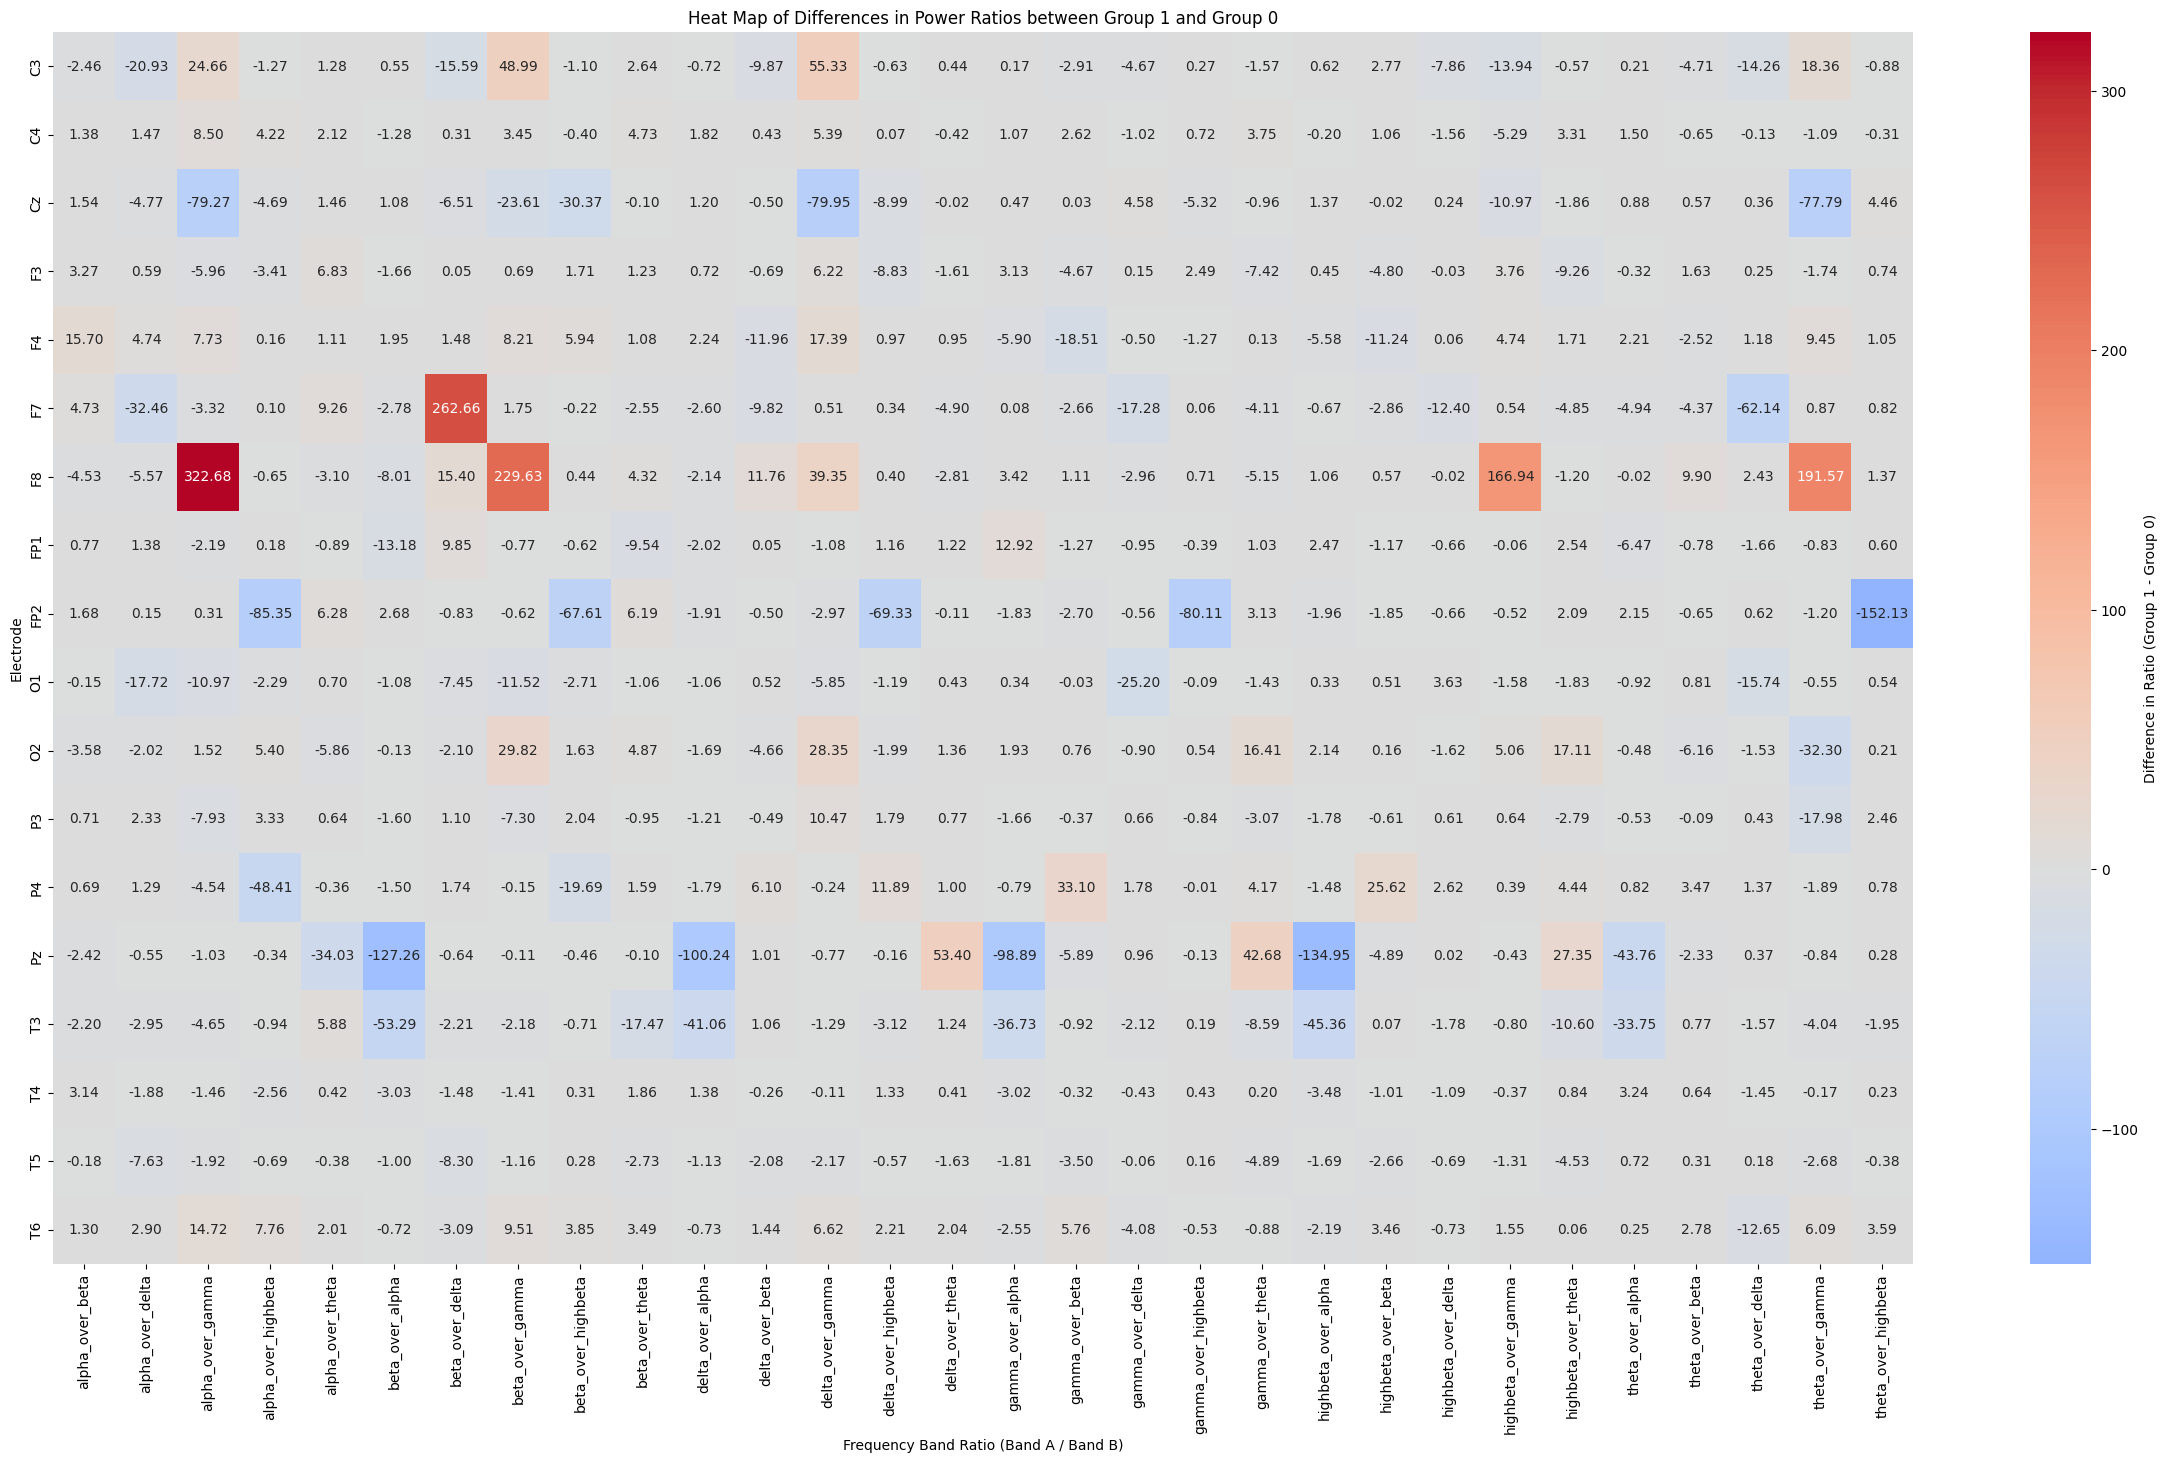

In [56]:
# Step 1: Calculate mean power ratios for each target group (0 and 1) across Electrodes and Ratios
group_0_means = power_ratios_electrodes[power_ratios_electrodes['target'] == 0].groupby(['Electrode', 'Ratio'])['Value'].mean()
group_1_means = power_ratios_electrodes[power_ratios_electrodes['target'] == 1].groupby(['Electrode', 'Ratio'])['Value'].mean()

# Step 2: Calculate the difference between groups (Group 1 - Group 0)
ratio_differences = group_1_means - group_0_means

# Step 3: Convert the differences to a DataFrame suitable for a heat map
# Reset index to turn MultiIndex into columns, then pivot for heat map format
ratio_differences_df = ratio_differences.reset_index().pivot(index='Electrode', columns='Ratio', values='Value')

# Step 4: Plot the heat map of differences
plt.figure(figsize=(30, 16))
sns.heatmap(ratio_differences_df, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar_kws={'label': 'Difference in Ratio (Group 1 - Group 0)'})
plt.title("Heat Map of Differences in Power Ratios between Group 1 and Group 0")
plt.xlabel("Frequency Band Ratio (Band A / Band B)")
plt.ylabel("Electrode")
plt.show()


The heat map demonstrate power differences on some electrodes, however, these may be partly due to scaling issues. I attempted to use log transform, which introduced new issues. Therefore the scaling will remain the same.

In [27]:
# @title Defining regional aggregates (between brain lobes)
# Define the regional aggregates.
pivot_df_reg = pivot_df.drop_duplicates(subset=['subject_id', 'Brain Lobe'])

# Assume "target" is already in pivot_df and associated with each "subject_id"
# Extract the "target" column for merging
target_data = pivot_df_reg[['subject_id', 'target']].drop_duplicates(subset='subject_id')

# Pivot the dataframe further to define columns based on freq bands/brain lobe.
df_regional = pivot_df_reg.pivot(index="subject_id", columns="Brain Lobe", values=freq_bands)

# Flatten the columns for better readability
df_regional.columns = [f"{lobe}_mean_{band}" for lobe, band in df_regional.columns]

# Merge the target labels based on "subject_id"
df_regional = df_regional.merge(target_data, on="subject_id", how="left")

df_regional.head()

,subject_id,delta_mean_Central,delta_mean_Frontal,delta_mean_Occipital,delta_mean_Parietal,delta_mean_Temporal,theta_mean_Central,theta_mean_Frontal,theta_mean_Occipital,theta_mean_Parietal,...,highbeta_mean_Frontal,highbeta_mean_Occipital,highbeta_mean_Parietal,highbeta_mean_Temporal,gamma_mean_Central,gamma_mean_Frontal,gamma_mean_Occipital,gamma_mean_Parietal,gamma_mean_Temporal,target
0,114,4.815377,5.086331,0.904823,2.992337,4.249168,4.355301,3.951662,2.647181,6.082242,...,1.295794,0.325636,0.831248,0.138634,0.064504,0.292933,-0.117374,0.457131,0.031752,0
1,115,-0.311639,1.361322,-0.604081,-0.204519,0.385633,-0.492130,-0.219530,-0.408557,-0.329045,...,0.284637,1.114300,0.710756,0.511968,0.326108,0.303218,0.725095,0.858431,0.151404,0
2,116,-0.011976,-0.228601,-0.381568,-0.309895,-0.201647,-0.046448,0.035201,-0.542166,-0.179628,...,-0.000929,0.157351,0.435284,0.203181,0.499312,0.436881,0.142816,0.868473,0.237768,0
3,117,-0.318129,-0.084796,-0.617483,-0.355658,0.260596,0.090490,-0.138709,-0.146842,0.075489,...,-0.682516,-0.629947,-0.716271,-0.459538,-0.647903,-0.764626,-0.670372,-0.778038,-0.530666,0
4,118,1.024317,0.311001,-0.696926,-0.244142,-0.535672,1.106286,0.862785,-0.486514,0.120814,...,-0.154457,-0.391371,-0.108781,-0.056738,0.290730,0.094140,-0.366621,0.011731,-0.082092,0


In [57]:
# @title Prepare power ratios of brain lobes

# Main function to prepare EEG feature DataFrame with log-transformed power ratios, retaining subject_id
def prepare_power_ratios(df_main):
    brain_lobes = ["Frontal", "Temporal", "Parietal", "Occipital", "Central"]
    freq_bands = ["delta", "theta", "alpha", "beta", "highbeta", "gamma"]

    # Step 1: Aggregate summed PSD for each brain lobe and frequency band per subject
    mean_psd, pivot_df = prepare_eeg_df(df_main)
    regional_sums = pivot_df.groupby(['subject_id', 'Brain Lobe', 'target'])[freq_bands].sum().reset_index()

    # Check so no NaNs have been introduced
    print(regional_sums.isnull().sum())

    # Step 2: Initialize list for storing log-transformed power ratios
    power_ratios = []

    # Compute ratios across brain lobes and frequency bands for each subject and target group
    for subject_id in regional_sums['subject_id'].unique():
        subject_data = regional_sums[regional_sums['subject_id'] == subject_id]
        target_group = subject_data['target'].iloc[0]  # Assuming target is consistent within a subject

        for lobe1 in brain_lobes:
            lobe_data1 = subject_data[subject_data['Brain Lobe'] == lobe1]
            if lobe_data1.empty:
                continue

            for lobe2 in brain_lobes:
                if lobe1 == lobe2:
                    continue  # Skip same-lobe comparisons

                lobe_data2 = subject_data[subject_data['Brain Lobe'] == lobe2]
                if lobe_data2.empty:
                    continue

                # Calculate log ratio for each frequency band
                for band in freq_bands:
                    psd1 = lobe_data1[band].values[0] if band in lobe_data1.columns else np.nan
                    psd2 = lobe_data2[band].values[0] if band in lobe_data2.columns else np.nan

                    # Ensure psd1 and psd2 are non-zero and non-negative to avoid NaNs
                    if not np.isnan(psd1) and not np.isnan(psd2) and psd2 != 0:
                        ratio = psd1 / psd2  # Use ratio directly for testing
                    else:
                        ratio = np.nan

                    # Append result for each frequency band separately
                    power_ratios.append({
                        'subject_id': subject_id,
                        'target': target_group,
                        'Lobe_Ratio': f"{lobe1}_over_{lobe2}",
                        'Frequency_Band': band,
                        'Log_Ratio': ratio
                    })


    # Step 4: Convert power_ratios list to DataFrame for further analysis or ML input
    power_ratios_df = pd.DataFrame(power_ratios)

    return power_ratios_df

# Run the function with your main DataFrame
power_ratios_df = prepare_power_ratios(df_main)
power_ratios_df.head()

print(power_ratios_df.isnull().sum())

# Check so all frequency bands is present
print(power_ratios_df['Frequency_Band'].unique())

0
Frequency Band
subject_id    0
Brain Lobe    0
target        0
delta         0
theta         0
alpha         0
beta          0
highbeta      0
gamma         0
dtype: int64
subject_id        0
target            0
Lobe_Ratio        0
Frequency_Band    0
Log_Ratio         0
dtype: int64
['delta' 'theta' 'alpha' 'beta' 'highbeta' 'gamma']


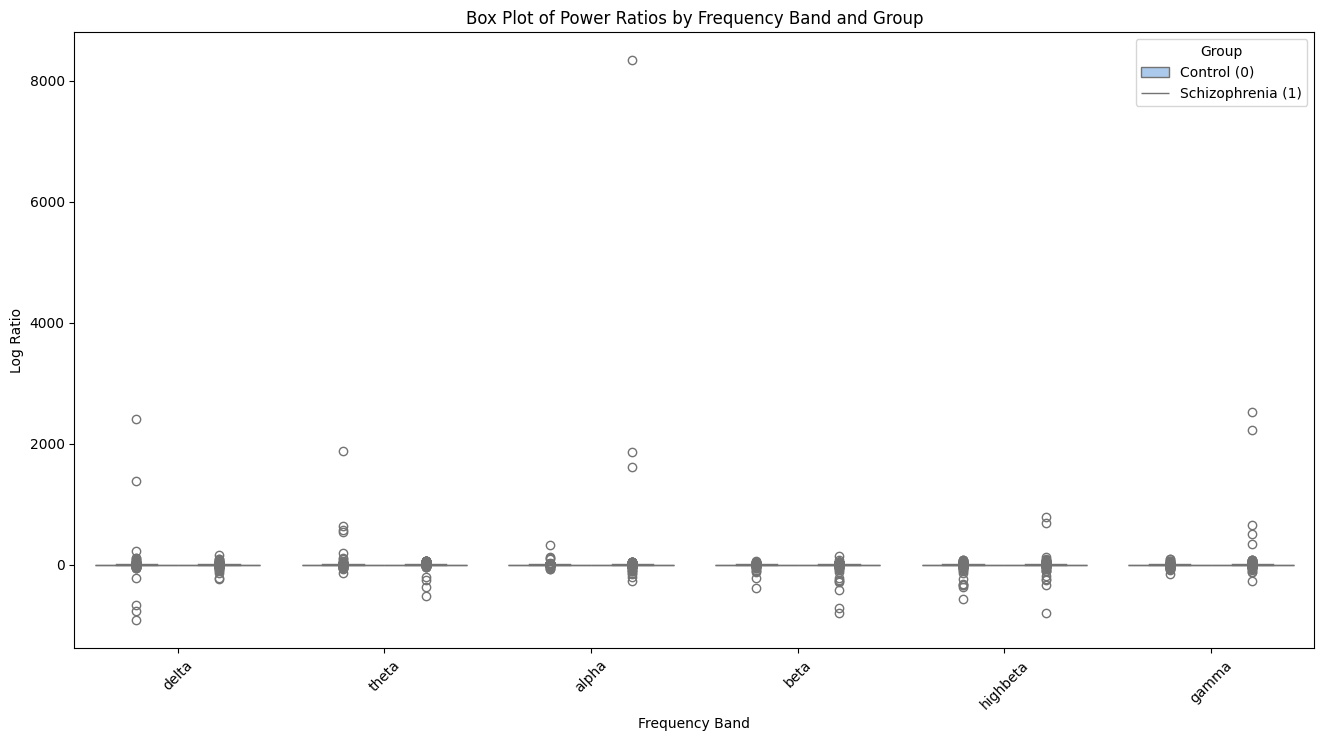

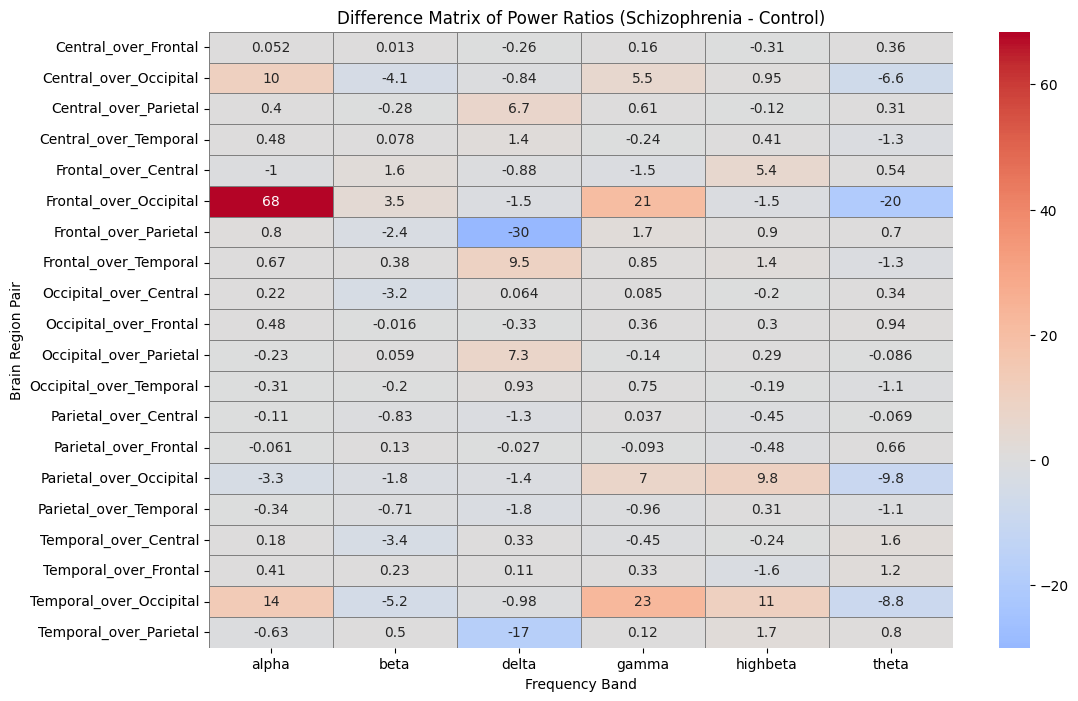

In [74]:
# @title Plot power ratios over brain lobes

# Box Plot: Average Power Ratios per Brain Region Pair and Frequency Band, split by Group
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=power_ratios_df,
    x='Frequency_Band', y='Log_Ratio', hue='target', palette="pastel"
)
plt.title('Box Plot of Power Ratios by Frequency Band and Group')
plt.ylabel('Log Ratio')
plt.xlabel('Frequency Band')
plt.legend(title='Group', labels=['Control (0)', 'Schizophrenia (1)'])
plt.xticks(rotation=45)
plt.show()

# Step 1: Calculate mean power ratios for each Lobe_Ratio, Frequency_Band, and target group
avg_power_ratios = power_ratios_df.groupby(['Lobe_Ratio', 'Frequency_Band', 'target']).mean().reset_index()

# Step 2: Pivot data to create separate columns for each group (Control and Schizophrenia)
pivoted_data = avg_power_ratios.pivot(index=['Lobe_Ratio', 'Frequency_Band'], columns='target', values='Log_Ratio')
pivoted_data.columns = ['Control', 'Schizophrenia']

# Step 3: Calculate the difference matrix (Schizophrenia - Control)
pivoted_data['Difference'] = pivoted_data['Schizophrenia'] - pivoted_data['Control']
difference_matrix = pivoted_data['Difference'].unstack(level='Frequency_Band')  # Unstack for heatmap

# Step 4: Plot the difference matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    difference_matrix, annot=True, cmap='coolwarm', center=0,
    linewidths=0.5, linecolor='gray'
)
plt.title('Difference Matrix of Power Ratios (Schizophrenia - Control)')
plt.xlabel('Frequency Band')
plt.ylabel('Brain Region Pair')
plt.show()


We can clearly see that the issue with log transformation does not give a good representation of the features. In a real case of ML for psychiatric diagnosis evaluation, this would need to be countered in some better way.

In [76]:
# @title I will now run a MLP Neural network for the regional analysis

# Define the MLP
model = keras.Sequential([
    layers.Dense(64, activation = "relu", name = "layer1"),
    layers.Dense(32, activation = "relu", name = "layer2"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")
])

# Define features
X = df_regional[[col for col in df_regional if col.startswith(("delta", "theta", "alpha", "beta", "highbeta", "gamma"))]]

# Scale features
X = scaler.fit_transform(X)

# Define labels
y = df_regional["target"]

#Split dataset into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model_trained = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2)

# Test Scores
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

# Try gradient boosting
rf_model = GradientBoostingClassifier(n_estimators=20, random_state=42, max_depth=3)

# Random Forest
rf_model.fit(X_train, y_train)
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# The gradient boosting provides the best accuracy = 0.69, however it may be overfitting
# as the test accuracy is really high

# Testing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Initialize Logistic Regression model with regularization
log_reg_model = LogisticRegression(penalty="l2", solver="liblinear", random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_train = log_reg_model.predict(X_train)
y_pred_test = log_reg_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_rep)

# The logistic regression provides little bit lower accuracy but the training accuracy is closer
# to the test accuracy which means the model is not overfitting. Furthermore the logistic regression
# predicts the healthy control with a 73% precision while only the schizophrenic with 53% precision. This
# may be due to imbalances of individuals between the groups.

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4937 - loss: 0.7535 - val_accuracy: 0.5882 - val_loss: 0.6503
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5388 - loss: 0.6780 
Test Accuracy: 0.5581395626068115, Test Loss: 0.6711640357971191
Training Accuracy: 0.9289940828402367
Testing Accuracy: 0.6976744186046512
Training Accuracy: 0.7869822485207101
Testing Accuracy: 0.6511627906976745

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.73      0.70      0.72        27

    accuracy                           0.65        43
   macro avg       0.63      0.63      0.63        43
weighted avg       0.66      0.65      0.65        43



Based on the metrics from the MLP we can see that the model does not generate convincing accuracy, but it provides high training accuracy. This is probably due to overfitting, but could also be due to low sample size/dataset.

In [77]:
df_regional.info()
df_regional.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subject_id               212 non-null    int64  
 1   delta_mean_Central       212 non-null    float64
 2   delta_mean_Frontal       212 non-null    float64
 3   delta_mean_Occipital     212 non-null    float64
 4   delta_mean_Parietal      212 non-null    float64
 5   delta_mean_Temporal      212 non-null    float64
 6   theta_mean_Central       212 non-null    float64
 7   theta_mean_Frontal       212 non-null    float64
 8   theta_mean_Occipital     212 non-null    float64
 9   theta_mean_Parietal      212 non-null    float64
 10  theta_mean_Temporal      212 non-null    float64
 11  alpha_mean_Central       212 non-null    float64
 12  alpha_mean_Frontal       212 non-null    float64
 13  alpha_mean_Occipital     212 non-null    float64
 14  alpha_mean_Parietal      2

,subject_id,delta_mean_Central,delta_mean_Frontal,delta_mean_Occipital,delta_mean_Parietal,delta_mean_Temporal,theta_mean_Central,theta_mean_Frontal,theta_mean_Occipital,theta_mean_Parietal,...,highbeta_mean_Frontal,highbeta_mean_Occipital,highbeta_mean_Parietal,highbeta_mean_Temporal,gamma_mean_Central,gamma_mean_Frontal,gamma_mean_Occipital,gamma_mean_Parietal,gamma_mean_Temporal,target
0,114,4.815377,5.086331,0.904823,2.992337,4.249168,4.355301,3.951662,2.647181,6.082242,...,1.295794,0.325636,0.831248,0.138634,0.064504,0.292933,-0.117374,0.457131,0.031752,0
1,115,-0.311639,1.361322,-0.604081,-0.204519,0.385633,-0.492130,-0.219530,-0.408557,-0.329045,...,0.284637,1.114300,0.710756,0.511968,0.326108,0.303218,0.725095,0.858431,0.151404,0
2,116,-0.011976,-0.228601,-0.381568,-0.309895,-0.201647,-0.046448,0.035201,-0.542166,-0.179628,...,-0.000929,0.157351,0.435284,0.203181,0.499312,0.436881,0.142816,0.868473,0.237768,0
3,117,-0.318129,-0.084796,-0.617483,-0.355658,0.260596,0.090490,-0.138709,-0.146842,0.075489,...,-0.682516,-0.629947,-0.716271,-0.459538,-0.647903,-0.764626,-0.670372,-0.778038,-0.530666,0
4,118,1.024317,0.311001,-0.696926,-0.244142,-0.535672,1.106286,0.862785,-0.486514,0.120814,...,-0.154457,-0.391371,-0.108781,-0.056738,0.290730,0.094140,-0.366621,0.011731,-0.082092,0


In [58]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform categorical columns
encoded_variables = encoder.fit_transform(power_ratios_df[["Lobe_Ratio", "Frequency_Band"]])

# Convert the encoded variables to a DataFrame with appropriate column names
df_encoded = pd.DataFrame(encoded_variables, columns=encoder.get_feature_names_out(["Lobe_Ratio", "Frequency_Band"]))

# Drop original categorical columns from power_ratios_df
df_power_ratios_encoded = pd.concat([power_ratios_df.drop(["Lobe_Ratio", "Frequency_Band"], axis=1), df_encoded], axis=1)

# Print to check if data is successfully one-hot encoded
print(f"One-Hot Encoded Data:\n{df_power_ratios_encoded}\n")

df_power_ratios_encoded.info()


One-Hot Encoded Data:
       subject_id  target  Log_Ratio  Lobe_Ratio_Central_over_Occipital  \
0             114       0   2.473657                                0.0   
1             114       0   1.713974                                0.0   
2             114       0   2.303229                                0.0   
3             114       0   2.477771                                0.0   
4             114       0   4.236977                                0.0   
...           ...     ...        ...                                ...   
25435         945       0   4.038557                                1.0   
25436         945       0   0.983023                                1.0   
25437         945       0  -0.994674                                1.0   
25438         945       0  -0.991511                                1.0   
25439         945       0 -64.928862                                1.0   

       Lobe_Ratio_Central_over_Parietal  Lobe_Ratio_Central_over_Temporal  \


In [34]:
#df_power_ratios_encoded.info()
df_power_ratios_encoded.head(50)

#power_ratios_df.Lobe_Ratio.nunique()

,subject_id,target,Log_Ratio,Lobe_Ratio_Central_over_Occipital,Lobe_Ratio_Central_over_Parietal,Lobe_Ratio_Central_over_Temporal,Lobe_Ratio_Frontal_over_Central,Lobe_Ratio_Frontal_over_Occipital,Lobe_Ratio_Frontal_over_Parietal,Lobe_Ratio_Frontal_over_Temporal,...,Lobe_Ratio_Parietal_over_Temporal,Lobe_Ratio_Temporal_over_Central,Lobe_Ratio_Temporal_over_Frontal,Lobe_Ratio_Temporal_over_Occipital,Lobe_Ratio_Temporal_over_Parietal,Frequency_Band_beta,Frequency_Band_delta,Frequency_Band_gamma,Frequency_Band_highbeta,Frequency_Band_theta
0,114,0,2.473657,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,114,0,1.713974,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,114,0,2.303229,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,114,0,2.477771,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,114,0,4.236977,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,114,0,9.790247,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,114,0,4.131093,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,114,0,2.670716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,114,0,5.307671,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,114,0,8.666981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
def check_nan_values(df, column):
    # Count NaN values in the specified column
    nan_count = df[column].isnull().sum()
    print(f"Number of NaN values in '{column}' column is:", nan_count)

    # Count the total number of non-NaN values in the specified column
    total_values = df[column].count()
    print(f"Total number of non-NaN values in '{column}' column is:", total_values)

    # Get the total number of rows in the specified column
    num_rows = len(df[column])
    print(f"Total number of rows in '{column}' column:", num_rows)

check_nan_values(df_power_ratios_encoded, "Log_Ratio")

Number of NaN values in 'Log_Ratio' column is: 0
Total number of non-NaN values in 'Log_Ratio' column is: 25440
Total number of rows in 'Log_Ratio' column: 25440


In [36]:
# @title I will now create the MLP for the power ratios of brain regions (lobes)

# Define the MLP
model = keras.Sequential([
    layers.Dense(128, activation = "relu", name = "layer1"),
    layers.Dense(64, activation = "relu", name = "layer2"),
    layers.Dense(32, activation = "relu", name = "layer3"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")
])
# Define columns
feature_columns = [col for col in df_power_ratios_encoded.columns if col.startswith(('Lobe_Ratio_', 'Frequency_Band_', 'Log_Ratio'))]

# Define features
X = df_power_ratios_encoded[feature_columns]

# Define labels
y = df_power_ratios_encoded["target"]

#Split dataset into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model_trained = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Test Scores
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy Power Ratio Between Lobes: {test_acc}, Test Loss: {test_loss}")

# Test predictions
#predictions = model.predict(X_test)
#print(f"Predictions:", predictions)

# Try gradient boosting
rf_model = GradientBoostingClassifier(n_estimators=20, random_state=42, max_depth=3)

# Random Forest
rf_model.fit(X_train, y_train)
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# The gradient boosting provides the best accuracy = 0.69, however it may be overfitting
# as the test accuracy is really high

# Testing logistic regression

# Initialize Logistic Regression model with regularization
log_reg_model = LogisticRegression(penalty="l2", solver="liblinear", random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_train = log_reg_model.predict(X_train)
y_pred_test = log_reg_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_rep)

Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5520 - loss: 0.7153 - val_accuracy: 0.5483 - val_loss: 0.7472
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5515 - loss: 0.7079 - val_accuracy: 0.5443 - val_loss: 0.9763
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5522 - loss: 0.7393 - val_accuracy: 0.5451 - val_loss: 0.7036
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5460 - loss: 0.7486 - val_accuracy: 0.5267 - val_loss: 0.7860
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5480 - loss: 0.7751 - val_accuracy: 0.5451 - val_loss: 0.7286
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5570 - loss: 0.9060 - val_accuracy: 0.5448 - val_loss: 0.6931
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5596 - loss: 0.6989 - val_accuracy: 0.5463 - val_loss: 0.8034
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5584 - loss: 0.7057 - val_accuracy: 0.

The model performed even worse with this aggregate features.

In [37]:
print(X)
print(df_power_ratios_encoded.columns)


       Log_Ratio  Lobe_Ratio_Central_over_Occipital  \
0       2.473657                                0.0   
1       1.713974                                0.0   
2       2.303229                                0.0   
3       2.477771                                0.0   
4       4.236977                                0.0   
...          ...                                ...   
25435   4.038557                                1.0   
25436   0.983023                                1.0   
25437  -0.994674                                1.0   
25438  -0.991511                                1.0   
25439 -64.928862                                1.0   

       Lobe_Ratio_Central_over_Parietal  Lobe_Ratio_Central_over_Temporal  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                              

In [38]:
power_ratios_electrodes.info()
print(power_ratios_electrodes.columns)
power_ratios_electrodes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   subject_id  114480 non-null  int64  
 1   Electrode   114480 non-null  object 
 2   Value       114480 non-null  float64
 3   Ratio       114480 non-null  object 
 4   target      114480 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ MB
Index(['subject_id', 'Electrode', 'Value', 'Ratio', 'target'], dtype='object')


,subject_id,Electrode,Value,Ratio,target
0,114,FP1,1.069649,delta_over_theta,0
1,114,FP1,0.996267,delta_over_alpha,0
2,114,FP1,3.433533,delta_over_beta,0
3,114,FP1,5.458656,delta_over_highbeta,0
4,114,FP1,36.823083,delta_over_gamma,0


In [39]:
check_nan_values(power_ratios_electrodes, "Value")

Number of NaN values in 'Value' column is: 0
Total number of non-NaN values in 'Value' column is: 114480
Total number of rows in 'Value' column: 114480


In [40]:
# One-hot encoding
# Fit and transform categorical columns
encoded_variables = encoder.fit_transform(power_ratios_electrodes[["Electrode", "Ratio"]])

# Consolidate into a dataframe
df_encoded = pd.DataFrame(encoded_variables, columns=encoder.get_feature_names_out(["Electrode", "Ratio"]))

# Define the list of categorical columns to drop from the original dataframe
categorical_columns = ["Electrode", "Ratio"]

# Concatenate one-hot encoded columns with the original dataframe
df_power_ratios_electrodes_encoded = pd.concat([power_ratios_electrodes.drop(categorical_columns, axis=1), df_encoded], axis=1)

# Print to check if data is successfully one-hot encoded
print(f"One-Hot Encoded Data with OneHotEncoder:\n{df_power_ratios_electrodes_encoded}\n")


One-Hot Encoded Data with OneHotEncoder:
        subject_id      Value  target  Electrode_C4  Electrode_Cz  \
0              114   1.069649       0           0.0           0.0   
1              114   0.996267       0           0.0           0.0   
2              114   3.433533       0           0.0           0.0   
3              114   5.458656       0           0.0           0.0   
4              114  36.823083       0           0.0           0.0   
...            ...        ...     ...           ...           ...   
114475         917   0.100996       1           0.0           0.0   
114476         917   0.101326       1           0.0           0.0   
114477         917   0.156174       1           0.0           0.0   
114478         917   0.129790       1           0.0           0.0   
114479         917   0.515812       1           0.0           0.0   

        Electrode_F3  Electrode_F4  Electrode_F7  Electrode_F8  Electrode_FP1  \
0                0.0           0.0           0.0 

In [41]:
print(X)
print(df_power_ratios_electrodes_encoded.columns)

       Log_Ratio  Lobe_Ratio_Central_over_Occipital  \
0       2.473657                                0.0   
1       1.713974                                0.0   
2       2.303229                                0.0   
3       2.477771                                0.0   
4       4.236977                                0.0   
...          ...                                ...   
25435   4.038557                                1.0   
25436   0.983023                                1.0   
25437  -0.994674                                1.0   
25438  -0.991511                                1.0   
25439 -64.928862                                1.0   

       Lobe_Ratio_Central_over_Parietal  Lobe_Ratio_Central_over_Temporal  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                              

In [42]:
# @title Create the MLP Neural network for df_power_ratios_electrodes

# Define the MLP
model = keras.Sequential([
    layers.Dense(64, activation = "relu", name = "layer1"),
    layers.Dense(32, activation = "relu", name = "layer2"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")
])
# Define columns
feature_columns = [col for col in df_power_ratios_electrodes_encoded.columns if col.startswith(('Ratio_', 'Value', 'Electrode_'))]

# Define features
X = df_power_ratios_electrodes_encoded[feature_columns]

# Define labels
y = df_power_ratios_electrodes_encoded["target"]

#Split dataset into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying pca to reduce dimensionality
pca = PCA(n_components= 0.95, whiten=True, svd_solver='auto')  #
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model_trained = model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Test Scores
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f"Test Accuracy Power Ratio Between Lobes: {test_acc}, Test Loss: {test_loss}")

# Test predictions
#predictions = model.predict(X_test)
#print(f"Predictions:", predictions)

# Try gradient boosting
rf_model = GradientBoostingClassifier(n_estimators=20, random_state=42, max_depth=3)

# Random Forest
rf_model.fit(X_train_pca, y_train)
train_accuracy = rf_model.score(X_train_pca, y_train)
test_accuracy = rf_model.score(X_test_pca, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

#
#

# Testing logistic regression

# Initialize Logistic Regression model with regularization
log_reg_model = LogisticRegression(penalty="l2", solver="liblinear", random_state=42)

# Train the model
log_reg_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_train = log_reg_model.predict(X_train_pca)
y_pred_test = log_reg_model.predict(X_test_pca)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_rep)

Epoch 1/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5509 - loss: 0.6886 - val_accuracy: 0.5475 - val_loss: 0.6886
Epoch 2/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5523 - loss: 0.6874 - val_accuracy: 0.5474 - val_loss: 0.6887
Epoch 3/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5524 - loss: 0.6876 - val_accuracy: 0.5474 - val_loss: 0.6894
Epoch 4/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5520 - loss: 0.6875 - val_accuracy: 0.5475 - val_loss: 0.6882
Epoch 5/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5540 - loss: 0.6871 - val_accuracy: 0.5473 - val_loss: 0.6883
Epoch 6/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5513 - loss: 0.6880 - val_accuracy: 0.5475 - val_loss: 0.6883
Epoch 7/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5519 - loss: 0.6872 - val_accuracy: 0.5472 - val_loss: 0.6888
Epoch 8/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5495 - loss: 0.6880 - 

Similarly on this aggregate feature. Most probably the reduction in the features of the dataset, resulted in less predictive power.

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5370 - loss: 0.6814 - val_accuracy: 0.5588 - val_loss: 0.6833
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5518 - loss: 0.6183 - val_accuracy: 0.7059 - val_loss: 0.6775
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7677 - loss: 0.5526 - val_accuracy: 0.6471 - val_loss: 0.6774
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8427 - loss: 0.5166 - val_accuracy: 0.5882 - val_loss: 0.6794
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9288 - loss: 0.4651 - val_accuracy: 0.5882 - val_loss: 0.7000
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9120 - loss: 0.4196 - val_accuracy: 0.6176 - val_loss: 0.7344
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8911 - loss: 0.3899 - val_accuracy: 0.5882 - val_loss: 0.7686
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.3441 - val_accuracy: 0.6176 - val_loss: 0.8139
Epoc

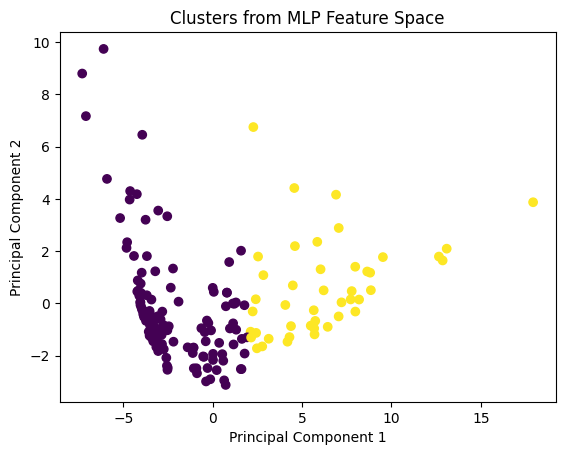

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6839 - loss: 1.2049
Test Accuracy: 0.6976743936538696, Test Loss: 1.1796362400054932
Training Accuracy for Gradient Boosting: 0.9763313609467456
Testing Accuracy for Gradient Boosting: 0.7209302325581395
Training Accuracy for Logistic Regression: 0.7455621301775148
Testing Accuracy for Logistic Regression: 0.7209302325581395

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.78      0.78      0.78        27

    accuracy                           0.72        43
   macro avg       0.70      0.70      0.70        43
weighted avg       0.72      0.72      0.72        43



In [78]:
# @title Lastly i create a MLP from the full dataset to see if it by itself, without any help can predict patterns of differences in activity between the groups.

# Assume df_main is your DataFrame loaded with your data
# Define columns
feature_columns = [col for col in df_main.columns if col.startswith(('AB.', 'COH.'))]

# Define X (features)
X = df_main[feature_columns]

# Create a binary target variable y: 1 for schizophrenia, 0 for healthy control
y = pd.Series(
    np.where(
        df_main["main_disorder_Schizophrenia"] == 1, 1,
        np.where(df_main["main_disorder_Healthy_control"] == 1, 0, np.nan)
    ),
    index=df_main.index
)

# Drop rows containing NaNs (not schizophrenia or healthy control)
X = X.loc[y.notna()]
y = y[y.notna()]

# Convert y to integer type
y = y.astype(int)

# Split dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95, whiten=True, svd_solver='auto')  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the MLP using Functional API
input_dim = X_train_pca.shape[1]
inputs = Input(shape=(input_dim,))
x = layers.Dense(256, activation="relu", name="layer1")(inputs)
x = layers.Dense(128, activation="relu", name="layer2")(x)
x = layers.Dense(32, activation="relu", name="layer3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Create the intermediate layer model
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer("layer3").output)

# Extract features from the penultimate layer
features = intermediate_layer_model.predict(X_train_pca)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
cluster_labels = kmeans.fit_predict(features)

# Evaluate clustering
ari = adjusted_rand_score(y_train, cluster_labels)
print(f"Adjusted Rand Index: {ari}")

# Visualize clustering results
pca_2d = PCA(n_components=2)
reduced_features = pca_2d.fit_transform(features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Clusters from MLP Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Evaluate model on the test set
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

# Random Forest
rf_model = GradientBoostingClassifier(n_estimators=20, random_state=42, max_depth=3)
rf_model.fit(X_train_pca, y_train)
train_accuracy_rf = rf_model.score(X_train_pca, y_train)
test_accuracy_rf = rf_model.score(X_test_pca, y_test)
print(f"Training Accuracy for Gradient Boosting: {train_accuracy_rf}")
print(f"Testing Accuracy for Gradient Boosting: {test_accuracy_rf}")

# Logistic Regression
log_reg_model = LogisticRegression(penalty="l2", solver="liblinear", random_state=42)
log_reg_model.fit(X_train_pca, y_train)
y_pred_train_lr = log_reg_model.predict(X_train_pca)
y_pred_test_lr = log_reg_model.predict(X_test_pca)

train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
classification_rep = classification_report(y_test, y_pred_test_lr)

print(f"Training Accuracy for Logistic Regression: {train_accuracy_lr}")
print(f"Testing Accuracy for Logistic Regression: {test_accuracy_lr}")
print("\nClassification Report:\n", classification_rep)


When i fed the whole dataset straight into the MLP it suceeded to predict differences to a 100% accuracy with a very small loss function! When i run the random forest and logistic regression it can clearly be seen that the deep learning model greatly outperformed all other models. The cluster analysis of the two principle components show a remarkable difference, but where does this difference come from? This was what i attempted next to understand.

In [59]:
# @title Cross validation with KFolds.
#
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA with a fixed number of components
    pca_cv = PCA(n_components=20, whiten=True, svd_solver='auto')
    X_train_cv_pca = pca_cv.fit_transform(X_train_cv)
    X_test_cv_pca = pca_cv.transform(X_test_cv)

    # Update input dimension based on PCA components
    input_dim_cv = X_train_cv_pca.shape[1]

    # Define and compile the model (ensure it's re-initialized each time)
    inputs_cv = Input(shape=(input_dim_cv,))
    x_cv = layers.Dense(256, activation="relu", name="layer1")(inputs_cv)
    x_cv = layers.Dense(128, activation="relu", name="layer2")(x_cv)
    outputs_cv = layers.Dense(1, activation="sigmoid", name="output_layer")(x_cv)

    model_cv = Model(inputs=inputs_cv, outputs=outputs_cv)
    model_cv.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    model_cv.fit(X_train_cv_pca, y_train_cv, epochs=20, batch_size=32, verbose=0)

    # Evaluate on the validation fold
    loss_cv, acc_cv = model_cv.evaluate(X_test_cv_pca, y_test_cv, verbose=0)
    fold_accuracies.append(acc_cv)

print(f"Cross-Validation Accuracies: {fold_accuracies}")
print(f"Mean CV Accuracy: {np.mean(fold_accuracies)}")


Cross-Validation Accuracies: [0.6279069781303406, 0.7441860437393188, 0.6190476417541504, 0.8333333134651184, 0.7142857313156128]
Mean CV Accuracy: 0.7077519416809082

The cross validation demonstrate that the model is overfitting. the model fit the training data extremely well, but not as well not unseen data


The cross validation demonstrate that the model is overfitting. the model fit the training data extremely well, but not as well not unseen data.

**This was my complete ML project. Thank you for taking the time to go through my journey.**